## Lectura Minnesota

Lectura de los archivos de reviews de Minnesota

In [1]:
import pandas as pd
import numpy as np
import missingno as msxo
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

Lectura de archivos json de las reviews efectuadas en el estado de Minnesota. Voy a proceder a realizar la lectura y juntar dichos archivos, al tener todos la misma estructura es posible realizarlo mediante iteracion.

In [2]:
df_1 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Minnesota/1.json', lines= True)
df_2 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Minnesota/2.json', lines= True)
df_3 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Minnesota/3.json', lines= True)
df_4 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Minnesota/4.json', lines= True)
df_5 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Minnesota/5.json', lines= True)
df_6 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Minnesota/6.json', lines= True)
df_7 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Minnesota/7.json', lines= True)
df_8 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Minnesota/8.json', lines= True)
df_9 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Minnesota/9.json', lines= True)
df_10 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Minnesota/10.json', lines= True)
df_11 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Minnesota/11.json', lines= True)
df_12 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Minnesota/12.json', lines= True)


C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encou

In [3]:
# Creo una lista para poder juntar todos los dataframes de los archivos en uno
dfs = []

# Itero entre cada uno de los dataframes para juntarlos en uno solo
for i in range(1, 13):
    
    df = globals()[f'df_{i}']
    dfs.append(df)


reviews_Minnesota = pd.concat(dfs, ignore_index=True)

In [4]:
# Vista primeros registros

reviews_Minnesota.head(3)

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.129131e+20,king 8488,1600976328270,5,Super helpful local business they are there fo...,None,"{'time': 1605627047572, 'text': 'Thank you for...",0x87f630d649635d65:0x57b17f6d51a91c8b
1,1.162558e+20,Steve Thornton,1544372192905,5,I was renting at a popular nation wide chain a...,None,"{'time': 1544549857922, 'text': 'Thank you Ste...",0x87f630d649635d65:0x57b17f6d51a91c8b
2,1.019050e+20,Jessica Perry,1464405464526,5,Hands down the best place ever! Ran by super n...,None,None,0x87f630d649635d65:0x57b17f6d51a91c8b


In [5]:
# Miro cuantos registros tenemos en el dataframe unido

reviews_Minnesota.shape

(1800000, 8)

In [6]:
# Miro el tipo de información

reviews_Minnesota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800000 entries, 0 to 1799999
Data columns (total 8 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  float64
 1   name     object 
 2   time     int64  
 3   rating   int64  
 4   text     object 
 5   pics     object 
 6   resp     object 
 7   gmap_id  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 109.9+ MB


In [7]:
# Checkeo de nulos y su porcentaje

nulls = pd.DataFrame(reviews_Minnesota.isnull().sum().sort_values(ascending = False))
nulls["Porcentaje de nulos"] = round(nulls/reviews_Minnesota.shape[0]*100,2)
nulls.rename(columns = {0:"Nro nulos"})

,Nro nulos,Porcentaje de nulos
pics,1751269,97.29
resp,1563067,86.84
text,778590,43.26
user_id,0,0.00
name,0,0.00
time,0,0.00
rating,0,0.00
gmap_id,0,0.00


In [8]:
reviews_Minnesota.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id'], dtype='object')

In [9]:
reviews_Minnesota.user_id.nunique()

181043

En el estado de XXXXXXXXXXXXX, tenemos YYYYYYYYYY usuarios que emitieron ZZZZZZZZZZZZZZZZ reseñas.

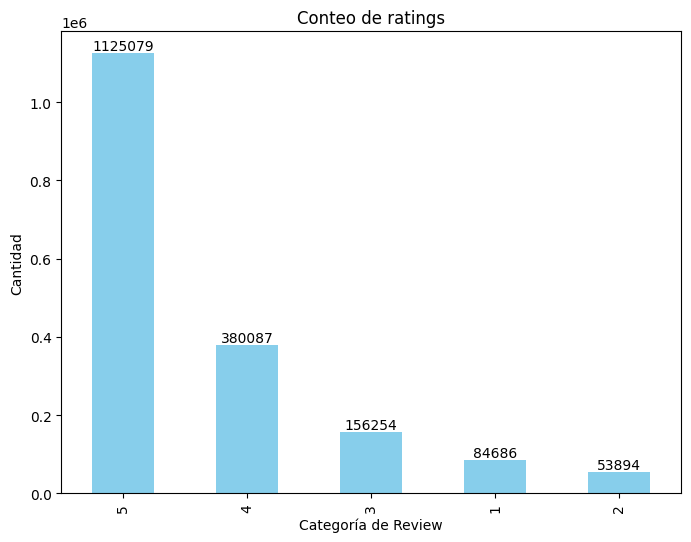

In [10]:
rating = reviews_Minnesota.rating.value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
rating.plot(kind='bar', color='skyblue')

# Agregar etiquetas a las barras
for i, count in enumerate(rating):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Configuración de etiquetas y título
plt.xlabel('Categoría de Review')
plt.ylabel('Cantidad')
plt.title('Conteo de ratings')

# Mostrar el gráfico
plt.show()


In [11]:
reviews_Minnesota['time'] = pd.to_datetime(reviews_Minnesota['time'], unit='ms').dt.strftime('%d/%m/%Y')

In [12]:
reviews_Minnesota['time'] = pd.to_datetime(reviews_Minnesota['time'], format='%d/%m/%Y')

reviews_Minnesota['year'] = reviews_Minnesota['time'].dt.year

In [13]:
min_date = reviews_Minnesota.time.min()
minimun_date = pd.to_datetime(min_date)
print(min_date)
print(minimun_date)

2007-05-25 00:00:00
2007-05-25 00:00:00


In [14]:
max_date = reviews_Minnesota.time.max()
maximun_date = pd.to_datetime(max_date)
print(max_date)
print(maximun_date)

2021-09-08 00:00:00
2021-09-08 00:00:00


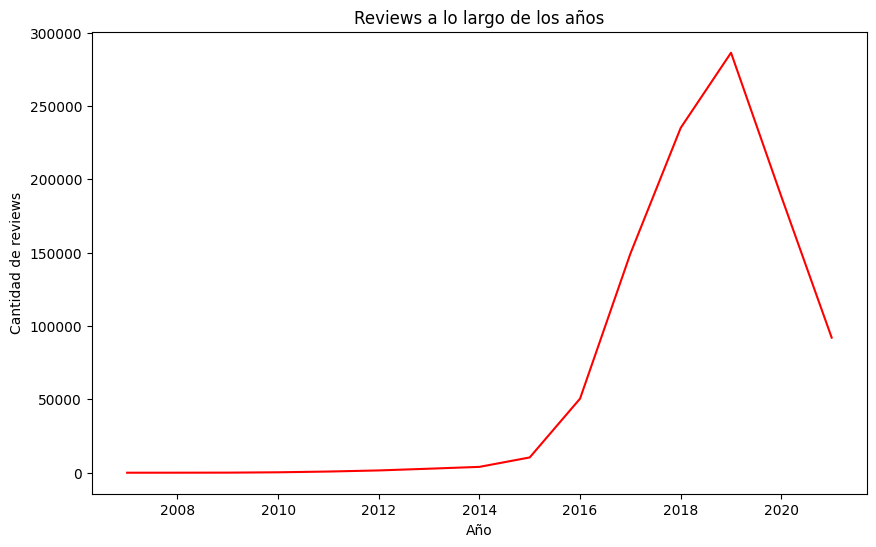

In [15]:
conteo_por_año= reviews_Minnesota[['year', 'text']].groupby('year').count().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=conteo_por_año, x='year', y= 'text', color='red')
plt.xlabel('Año')
plt.ylabel('Cantidad de reviews')
plt.title('Reviews a lo largo de los años')
plt.show()


In [16]:
reviews_Minnesota["text"] = reviews_Minnesota["text"].astype(str)
reviews_Minnesota.dropna(subset=["text"], inplace=True)

In [17]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


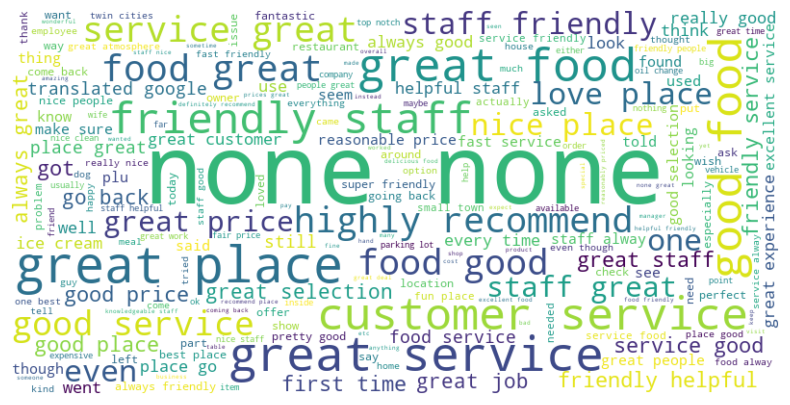

In [18]:
texto = " ".join(reviews_Minnesota["text"])

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words("english"))
words = word_tokenize(texto)
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

texto_procesado = " ".join(words)

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto_procesado)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
